In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

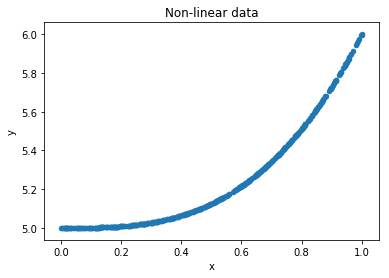

In [2]:
# generate some random data
df = pd.DataFrame()
df['x'] = np.random.rand(500,1).flatten()
df['y'] = df['x'] ** 3 + 5
_=df.plot.scatter(x='x',y='y',title='Non-linear data')

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=300, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

,x,y,yhat
0,0.948122,5.852302,5.856858
1,0.751251,5.423990,5.422724


mse=0.00001


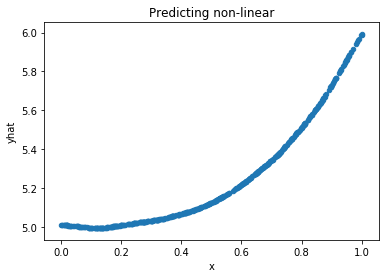

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree, ensemble, linear_model, svm

# X_train, X_test, y_train, y_test = train_test_split(df.x, df.y, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = X_train.values.reshape(-1,1), X_test.values.reshape(-1,1) \
# , y_train.values.reshape(-1,1), y_test.values.reshape(-1,1)

# lm = linear_model.LinearRegression()
# lm.fit(X_train,y_train)
# pred = pd.DataFrame()
# pred['x'] = X_test.squeeze()
# pred['y'] = y_test.squeeze()
# pred['yhat'] = lm.predict(X_test)
# pred.head(2)
# pred.plot.scatter(x='x',y='yhat')

# print('r2 = {:.2f}'.format(lm.score(X_train,y_train)))
# print('mse = {:.2f}'.format(mean_squared_error(pred.y,pred.yhat)))

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

mlp = MLPRegressor(hidden_layer_sizes=(300), activation='tanh', solver='lbfgs')
gs = GridSearchCV(mlp, param_grid={'activation': ["identity", "logistic", "tanh", "relu"]},cv=3)
gs.fit(df.x.values.reshape(-1,1),df.y.ravel())
df['yhat'] = gs.predict(df.x.values.reshape(-1,1))
df.head(2)
_=df.plot.scatter(x='x',y='yhat',title='Predicting non-linear')
print('mse={:.5f}'.format(mean_squared_error(df.yhat,df.y)))